<a href="https://colab.research.google.com/github/paulxdillon/Chem-Eng/blob/master/Bioreactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WORK-IN-PROGRESS

A Model for penicilin using Bajpai & Reuss, J. Chem Tech. Biotechno, 1980

Text(0, 0.5, 'Volume [liter]')

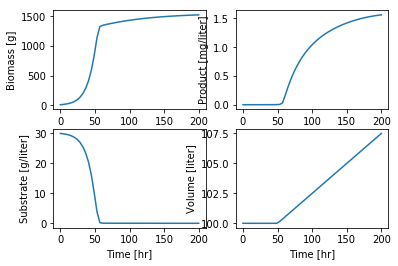

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

mux = 0.092       # [1/hr]
Kx = 0.15           # [-]
muP = 0.005        # [1/hr]
KI = 0.1            # [g/L]
KP = 0.0002        # [g/L]
K = 0.04            # [1/hr] 
Yxs = 0.45          # g/g
Yps = 0.9          # g/g
mx = 0.014          # [gm glucose/gm dry wgt cells/hr]


Sf = 600           # [g/litre]
#V = 1000            # [L]

S0 = 30            # [g/liter]
P0 = 0.0
X0 = 0.1
V0 = 100.0         # litre

# inlet flowrate
def F(t):
    if(t<50):
        return 0.0
    else:
        return 0.05

def xdot(x,t):
    X,P,S,V = x
    dX = mux*S/(Kx*X+S)*X - X/V*( F(t) )
    dP = muP*S/(KP + S +S*S/KI)*X - K*P - P/V*( F(t) )
    dS = -mux/Yxs*S/(Kx*X+S)*X -muP/Yps*S/(KP+S+S**2/KI)*X - mx*X + F(t)*Sf/V - S/V*( F(t) )
    dV = F(t)
    return [dX,dP,dS,dV]

IC = [X0, P0, S0, V0]

t = np.linspace(0,200)
sol = odeint(xdot,IC,t)
X,P,S,V = sol.transpose()

x = range(10)
y = range(10)


plt.subplot(2, 2, 1)
plt.plot(t,X*V)
plt.xlabel('Time [hr]')
plt.ylabel('Biomass [g]')

plt.subplot(2, 2, 2)
plt.plot(t,P)
plt.xlabel('Time [hr]')
plt.ylabel('Product [mg/liter]')

plt.subplot(2, 2, 3)
plt.plot(t,S)
plt.xlabel('Time [hr]')
plt.ylabel('Substrate [g/liter]')

plt.subplot(2, 2, 4)
plt.plot(t,V)

plt.xlabel('Time [hr]')
plt.ylabel('Volume [liter]')